In [1]:
from urllib.parse import unquote
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import statistics as stts
import json
import datetime 

# artist

## analyze 30Music

In [ ]:
def read_person_idomaar(filename = '/home/tamak/master_exp/ThirtyMusic/entities/persons.idomaar'):

    artist_list = []

    with open( filename, mode = 'r' ) as f:
        for line in f.readlines():
            attribute, id, MBID, name, _ = line.split('\t')
            # data = data
            if len(name.split('"')) == 9:
                name = name.split('"')[7].removesuffix('}')
            else:
                name = name.split('"')[5].removesuffix('}')
            try:
                artist_list.append( unquote(name).replace('+',' ') )
            except:
                print(unquote(name))
    
    return artist_list

In [ ]:
def idomaar_artist_dict(filename = '/home/tamak/master_exp/ThirtyMusic/entities/persons.idomaar'):

    artist_dict = defaultdict(str)

    with open( filename, mode = 'r' ) as f:
        for line in f.readlines():
            attribute, id, MBID, name, _ = line.split('\t')
            # data = data
            if len(name.split('"')) == 9:
                name = name.split('"')[7].removesuffix('}')
            else:
                name = name.split('"')[5].removesuffix('}')
            try:
                artist_dict[id] = unquote(name).replace('+',' ') 
            except:
                print(unquote(name))
            artist_dict[id] = unquote(name)
    
    return artist_dict

In [10]:
artist_list1 = read_person_idomaar()

print(len(artist_list1))
print(artist_list1[:10])

595049
['Everything Is Illuminated', "Robin O'Brien", 'Nicholas Gunn  (2012)', 'Aspasia Stratigou', 'Allison Veltz', 'Drake & Coldplay', 'Javi Colina', 'Kenneth Thomas Feat. Betsy Larkin', 'Koota Tanimura', 'Danny Overbea']


## spotify playlists dataset

In [4]:
def get_artist_spotify( filename = '/home/tamak/experiments/spotify_dataset_modified.tsv' ):

    artist_list = []

    with open( filename, mode = 'r' ) as f:
        for line in f.readlines():
            user, artist, track, playlist = line.split('\t')
            artist_list.append(artist)
    
    return artist_list

## analyze

In [11]:
artist_list2 = get_artist_spotify()

print(len(set(artist_list2)))
print(artist_list2[:10])

289602
['Elvis Costello', 'Elvis Costello & The Attractions', 'Tiffany Page', 'Elvis Costello & The Attractions', 'Elvis Costello', 'Lissie', 'Paul McCartney', 'Joe Echo', 'Paul McCartney', 'Lissie']


In [111]:
print(len(  set(artist_list2) & set(artist_list1)  ))
print( list( set(artist_list2) & set(artist_list1))[:10]  )

141062
['David Bolzoni', 'Lady Linn And Her Magnificent Seven', 'English Consort of Viols', 'BellaMaine', 'Mother Engine', 'Comet Control', 'Adam Foley', 'Concept 1', 'Sudden Weather Change', 'Jim West']


In [138]:
tmp = []
for artist in artist_list1:
    if "\\" in artist:
        tmp.append(artist)

print(tmp)

['f:\\Сестры\\Merzbow', '\\rif', '///▲▲▲\\\\\\', '\\Flairck', 'Sean Buckley\\Breadcrumbs', 'aidan baker \\ thisquietarmy', 'Cut\\Copy', 'NZCA\\/LINES', '\\m/ Король и Шут', '[MP3-V0]\\大象體操', 'Clean Bandit w\\ Jess Glynne', "///'Horse MacGyver\\", 'S†∑∆▲C▼/\\▲', 'KLF\\\\Jamms\\\\Disco 2000', 'Grace Bumbry (mezzo-soprano) \\ Radio-Symphonie-Orchester Berlin \\ Lorin Maazel', 'Vice Wolf  \\\\\\W/// Waver & K-Kat', 'Giuliano Carmignola (violin) \\ Venice Baroque Orchestra \\ Andrea Marcon', 'Amy Schugar \\ Michael Schenker', 'The Cleveland Orchestra \\ Pierre Boulez', 'Palm / I \\ Highway Chase', 'ЙЫНРУТИБРАБ\\MEEKH', "Hey, versuch\\'s nochmal mit mi", 'Mono\\Poly', '13.5 (Невменяемый\\Levon)', 'The\\Das', '\\\\\\\\\\\\^◊^///', 'Pete Rock\\\\Smif-n-Wessun', 'Andre Bielecki (tenor) \\ Don Kosaken Chor \\ Serge Jaroff', 'Los Angeles Philharmonic \\ Leonard Bernstein', "May'n (Sheryl Nome) \\ Nakajima Megumi (Ranka Lee)", '\\Paul McCartney', '14\\\\ Beatbot feat. Rael', '∆®¥ \\/\\/∆®|\\|∆∆®',

In [157]:
print(unquote("%5CFlairck"))
print(repr(unquote("%5CFlairck")))
print([repr(unquote("%5CFlairck"))])

\Flairck
'\\Flairck'
["'\\\\Flairck'"]


In [156]:
print(unquote("Elvis Costello"))
print(repr(unquote("Elvis Costello")))
print([repr(unquote("Elvis Costello"))])

Elvis Costello
'Elvis Costello'
["'Elvis Costello'"]


# track

## 30music

In [ ]:
def read_track_idomaar(filename = '/home/tamak/master_exp/ThirtyMusic/entities/tracks.idomaar'):

    track_list = []
    artist_dict = idomaar_artist_dict()

    with open( filename, mode = 'r' ) as f:
        for line in f.readlines():
            attribute, id, _, track_, artist_ = line.split('\t')
            if len(track_.split('"')) == 13:
                track_ = track_.split('"')[11].replace('+',' ')
            else:
                track_ = track_.split('"')[9].replace('+',' ')
            try:
                artist, track = unquote(track_).split('/_/')
            except:
                print('error')
                print(line.split('\t')[3].split('"'))
                print(line.split('\t'))
            
            track_list.append( (track , artist ) )
    
    return track_list

def track_list_to_dict( track_list ):

    artist_track_dict = defaultdict(list)
    for track, artist in track_list:
        artist_track_dict[ artist ].append(track)
    
    return artist_track_dict

In [8]:
track_list1 = read_track_idomaar()
print(len(track_list1))
print(track_list1[:10])

5675143
[("Dj's Rock Da House Â≈Æ≈Ê01 - Dj Max-Pulemet Vs. Bomfunk Mc's - Electro Breakdance party 1 [2000] = CD ONEÂ≈Æ≈Ê", '000003 Music Instructor'), ('Текст', '00-01'), ('Overkill', '0005. Overkill'), ('Ruleta Rusa', '000C Tony Dize'), ('Tumbay‚ (Lyrics)', '000 Oscarcito'), ('Rats and Butterflies (Original Mix)', '000'), ('Verticle', '0 0 0'), ('Verticle', '000'), ('Naonian Style', '0010110000010011 (Cancer)'), ('03_Respublika', '001')]


## spotify

In [6]:
def get_track_spotify( filename = '/home/tamak/experiments/spotify_dataset_modified.tsv' ):

    track_list = []

    with open( filename, mode = 'r' ) as f:
        for line in f.readlines():
            user, artist, track, playlist = line.split('\t')
            track_list.append( (track,artist) )
    
    return list(set(track_list))

def spotify_artist_track_dict( track_list ):

    artist_track_dict = defaultdict(list)
    for track, artist in track_list:
        artist_track_dict[ artist ].append(track)
    
    return artist_track_dict

In [7]:
track_list2 = get_track_spotify()
print(len(track_list2))
print(track_list2[:10])

2789644
[('Every Moment', 'Soil'), ('News', 'Clove'), ('Hypnotron', 'Die Form'), ('Mean Thoughts And Cheap Shots', 'The Rocket Summer'), ('I’ll Take Care Of You', 'Gil Scott-Heron'), ('I Need You Tonight (feat. Ed. Drewett) [Radio Edit]', 'Professor Green'), ('Fall Out', 'The Police'), ('Stars', 'Nightmares On Wax'), ('Changing The World For Good', 'Percy Bady'), ("Herbs An' Spices", 'Ziggy Marley & The Melody Makers')]


## analyze

In [19]:
print( len( set(track_list1) & set(track_list2) ))

856761


In [12]:
thMusic_dict = track_list_to_dict(track_list1)
spotify_dict = track_list_to_dict(track_list2)

shared_artist = list(  set(artist_list2) & set(artist_list1)  )
print(len(shared_artist))

141062


## check on song

In [15]:
"BellaMaine" in shared_artist

True

In [16]:
tmp = 'BellaMaine'
print( sorted(thMusic_dict[tmp]) )
print( sorted(spotify_dict[tmp]) )

['20 to 5', 'An Anxious Mind', 'Away With The Boys', 'BellaMaine - Three Years', 'Single Life', 'Three Years']
['An Anxious Mind', 'Away With the Boys', 'Single Life']


In [17]:
for song in sorted(thMusic_dict[tmp]):
    print(song, ' : ', song in spotify_dict[tmp])

20 to 5  :  False
An Anxious Mind  :  True
Away With The Boys  :  False
BellaMaine - Three Years  :  False
Single Life  :  True
Three Years  :  False


In [18]:
set( sorted(thMusic_dict[tmp]) ) & set( sorted(spotify_dict[tmp]) )

{'An Anxious Mind', 'Single Life'}

In [32]:
shared_artist2 = set(thMusic_dict.keys()) & set(spotify_dict.keys())
sorted(shared_artist2, key = lambda x: len(spotify_dict[x]), reverse=True)[:10]

['Ludwig van Beethoven',
 'Antonio Vivaldi',
 'Ilaiyaraaja',
 'David Bowie',
 'Piano Tribute Players',
 'Depeche Mode',
 'Barenaked Ladies',
 'Robert Schumann',
 'Johannes Brahms',
 'Smooth Jazz All-Stars']

In [15]:
tmp = 'Ludwig van Beethoven'
# print( sorted(thMusic_dict[tmp]) )
# print( sorted(spotify_dict[tmp]) )
for t in sorted(thMusic_dict[tmp]):
    if 'Andante - Allegro' in t:
        print(t)

print('=========================================================================================================')

for t in sorted(spotify_dict[tmp]):
    if 'Andante - Allegro' in t:
        print(t)

01 Sonata 13 in Eb Op.27,1 - I - Andante - Allegro - Tempo 1
Beethoven: Piano Sonata No.13 In E Flat Opus 27 No.1: 1. Andante - Allegro
Cello Sonata No. 4 in C major, Op. 102 No. 1 - I. Andante - Allegro vivace
Cello Sonata No. 4 in C major, Op. 102, No. 1: I. Andante - Allegro vivace
Music to Goethe's Tragedy "Egmont" op.84: 2. Entr'acte I - Andante - Allegro con brio
Piano Sonata No. 13 in Eb Op.27,1 - I - Andante - Allegro - Tempo 1
Beethoven: Piano Sonata No.13 in E flat, Op.27 No.1 - 1. Andante - Allegro - Tempo I
Cello Sonata, No. 4, in C Major, Op. 102 : No. 1: I. Andante - Allegro Vivace
Cello Sonata, No. 4, in C Major, Op. 102 No. 1: II. Adagio - Tempo D'Andante - Allegro Vivace
Piano Sonata No. 13 in E-Flat Major, Op. 27/1 Quasi una fantasia": I. Andante - Allegro - Tempo I"
Piano Sonata No.13 In E Flat, Op.27 No.1: 1. Andante - Allegro - Tempo I
Piano Sonata No.13 in E flat, Op.27 No.1: 1. Andante - Allegro - Tempo I
Sonata No. 4 in C Major for Cello and Piano, Op. 102: I. A

Cello Sonata, No. 4, in C Major, Op. 102 : No. 1: I. Andante - Allegro Vivace
Cello Sonata No. 4 in C major, Op. 102, No. 1: I. Andante - Allegro vivace

In [ ]:
for artist in shared_artist:
    if( len( set( thMusic_dict[artist] )  & set( spotify_dict[artist] ) ) > 0 ):
        print(artist)
        # print( sorted(thMusic_dict[artist]) )
        # print( sorted(spotify_dict[artist]) )
        print( set( thMusic_dict[artist] )  & set( spotify_dict[artist] ) )

In [ ]:
import numpy as np
srt_list = sorted( shared_artist2, key = lambda x:  len(thMusic_dict[x]) + len(spotify_dict[x]) / ( len(thMusic_dict[x]) * len(spotify_dict[x]) ) , reverse=True  ) 

artist = srt_list[0]

print(artist)
print( thMusic_dict[artist][:min(100, len(thMusic_dict[artist]))] )
print( spotify_dict[artist][:min(100,len(spotify_dict[artist]))] )

ZeroDivisionError: division by zero

In [ ]:
'Ludwig van Beethoven_01 Sonata 13 in Eb Op.27,1 - I - Andante - Allegro - Tempo 1'
'Piano Sonata No.13 in E flat, Op.27 No.1: 1. Andante - Allegro - Tempo I'

In [92]:
import ast

s = "\\'Everything\tIs\tIlluminated"         # raw文字列として書いたような文字列
s_repr = repr(s)            # → "'Hello\\nWorld'"
s_normal = ast.literal_eval(s_repr)  # → "Hello\nWorld"（改行が反映される）

print(s)
print()
print(s_repr)
print()
print(s_normal)  # 実際に改行されて表示される

\'Everything	Is	Illuminated

"\\'Everything\tIs\tIlluminated"

\'Everything	Is	Illuminated


# session

## 30Muysic

session

セッション数： 2764474
平均： 11.341016410355099
分散： 435.32505867606255
中央値： 6.0
最頻値： 1
[ 1.  1.  2.  6. 13. 26. 39.]


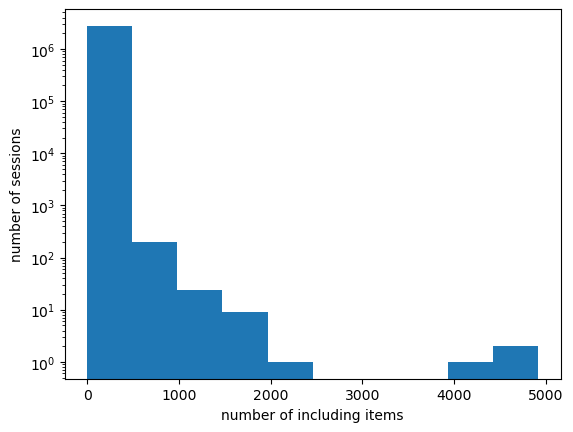

In [4]:
filename = '/home/tamak/master_exp/ThirtyMusic/relations/sessions.idomaar'

numtracks_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        event_type, session_id, timestamp, info, linked_data = line.split()

        numtracks = json.loads(info)['numtracks']
        numtracks_list.append(numtracks)

print('セッション数：',len(numtracks_list))
print('平均：',np.average(numtracks_list))
print('分散：',np.var(numtracks_list))
print('中央値：',stts.median(numtracks_list))
print('最頻値：',stts.mode(numtracks_list))
print( np.percentile( numtracks_list, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(numtracks_list, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [8]:
numtracks_list = np.array(numtracks_list)
len(numtracks_list[numtracks_list==1])/len(numtracks_list)

0.18627268695599958

39.0
8.072444998240325
64.44792077839314


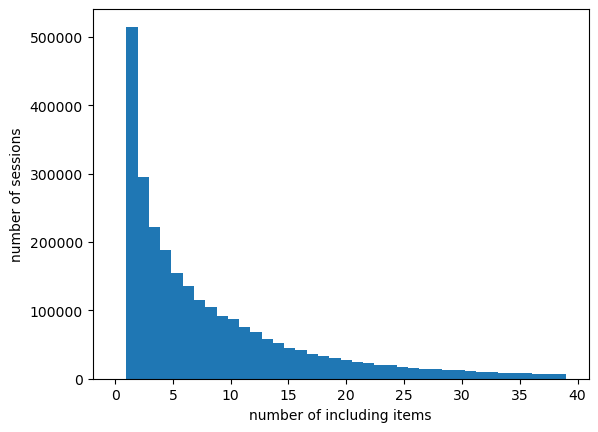

In [73]:
lim = np.percentile( numtracks_list, 95 )
print(lim)
numtracks_list = np.array(numtracks_list)

print(np.average(numtracks_list[numtracks_list<=lim]))
print(np.var(numtracks_list[numtracks_list<lim]))

plt.figure()
plt.hist(numtracks_list, bins = 40 , range = [0,lim], log = False)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [52]:
len(numtracks_list[numtracks_list<lim])/len(numtracks_list)

0.9485117241109882

累積パーセント

2764474


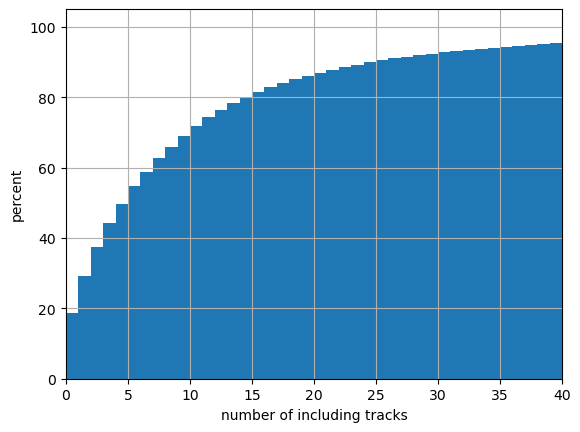

In [46]:
num_hist = []
numtracks_list = np.array(numtracks_list)

print(len(numtracks_list) )
for num in range(max(numtracks_list)):
    num_hist.append( 100*len( numtracks_list[numtracks_list<=(num+1)] ) / len(numtracks_list) )

plt.figure()
plt.bar(x=[num+0.5 for num in range(max(numtracks_list))], height=num_hist, width=1)
plt.xlabel('number of including tracks')
plt.ylabel('percent')
plt.grid()
plt.xlim([0,40])
plt.show()

playlist

平均： 31.37825423849046
分散： 1843.8786127429105
中央値： 14.0
最頻値： 2


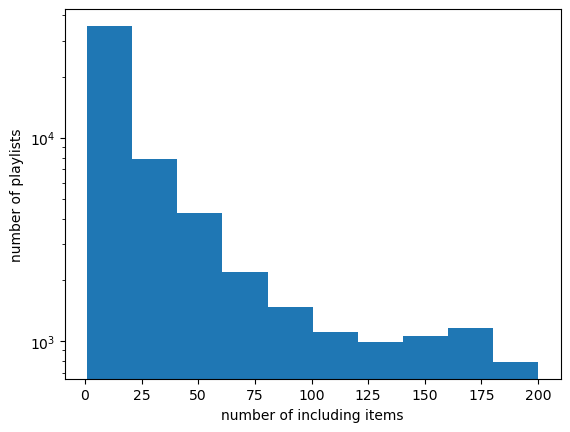

In [10]:
filename = '/home/tamak/master_exp/ThirtyMusic/entities/playlist.idomaar'

numtracks_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        data = line.split('\t')[3]
        try:
            numtracks = int(data.split('"numtracks"')[1].split(',')[0].removeprefix(':'))
            if numtracks > 0:
                numtracks_list.append(numtracks)
        except:
            print(data.split('"numtracks"')[1].split(','))

print('平均：',np.average(numtracks_list))
print('分散：',np.var(numtracks_list))
print('中央値：',stts.median(numtracks_list))
print('最頻値：',stts.mode(numtracks_list))

plt.figure()
plt.hist(numtracks_list, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of playlists')
plt.show()

In [13]:
numtracks_list = np.array(numtracks_list)
len(numtracks_list[numtracks_list==1])/len(numtracks_list)

0.02830389444562673

144.0
24.119349781643088
870.3420879800381


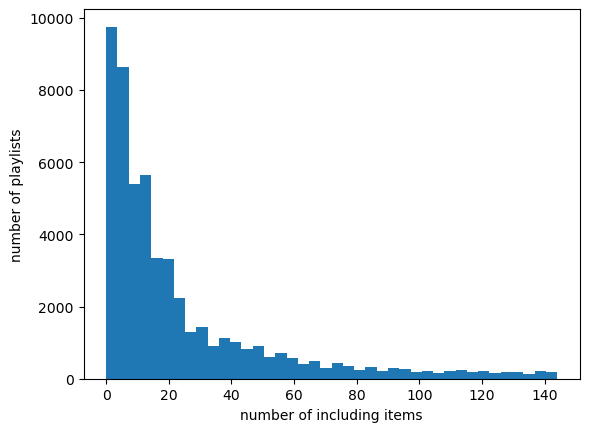

In [71]:
lim = np.percentile( duration_list, 95 )
print(lim)

duration_list = np.array(duration_list)

print(np.average(duration_list[duration_list<=lim]))
print(np.var(duration_list[duration_list<=lim]))


plt.figure()
plt.hist(duration_list, bins = 40 , range = [0,lim], log = False)
plt.xlabel('number of including items')
plt.ylabel('number of playlists')
plt.show()

## 同一期間

セッション数： 710324
平均： 11.970723219263322
分散： 484.69750587065585
中央値： 6.0
最頻値： 1
[ 1.  1.  2.  6. 13. 27. 41.]


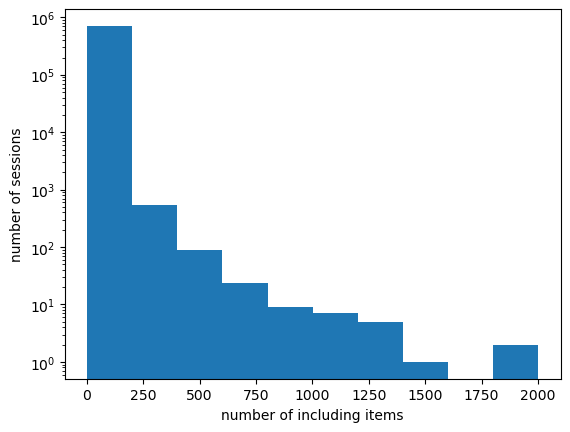

In [3]:
filename = '/home/tamak/master_exp/ThirtyMusic/relations/sessions.idomaar'

numtracks_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        event_type, session_id, timestamp, info, linked_data = line.split()

        if int(timestamp) < 1399766400:
            numtracks = json.loads(info)['numtracks']
            numtracks_list.append(numtracks)

print('セッション数：',len(numtracks_list))
print('平均：',np.average(numtracks_list))
print('分散：',np.var(numtracks_list))
print('中央値：',stts.median(numtracks_list))
print('最頻値：',stts.mode(numtracks_list))
print( np.percentile( numtracks_list, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(numtracks_list, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [5]:
710324/2764474

0.2569472528951258

## 時間も比較（プレイリストも）

session

3072.367872699332
23481182.45241136
[  225.   325.   726.  1710.  3575.  6884. 10198.]


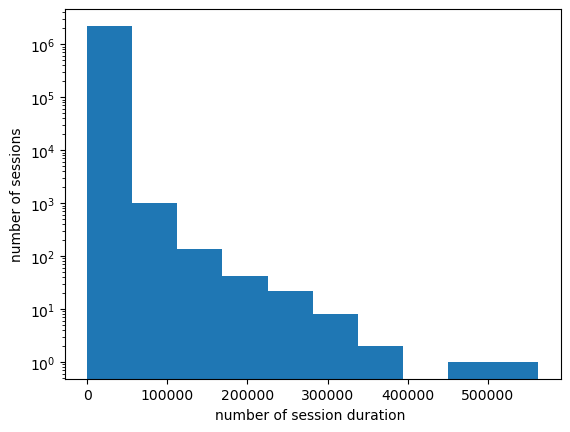

In [65]:
filename = '/home/tamak/master_exp/relations/sessions.idomaar'

duration_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        data = line.split('\t')[3].split(' ')[0]
        duration = int(data.split('"')[4].removeprefix(':').removesuffix('}'))
        if duration > 0:
            duration_list.append(duration)

print(np.average(duration_list))
print(np.var(duration_list))
print( np.percentile( duration_list, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(duration_list, log = True)
plt.xlabel('number of session duration ')
plt.ylabel('number of sessions')
plt.show()

10198.0
2281.408231907097
4519391.879267775


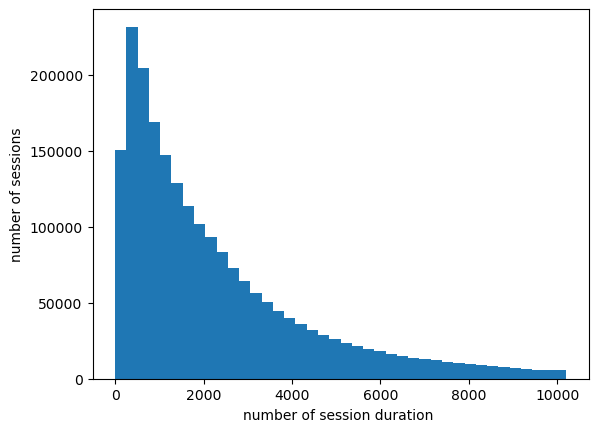

In [66]:
lim = np.percentile( duration_list, 95 )
print(lim)

duration_list = np.array(duration_list)

print(np.average(duration_list[duration_list<=lim]))
print(np.var(duration_list[duration_list<=lim]))

plt.figure()
plt.hist(duration_list, bins = 40 , range = [0,lim], log = False)
plt.xlabel('number of session duration ')
plt.ylabel('number of sessions')
plt.show()

playlist

8251.115789286918
142058828.18772483
[  444.   558.  1378.  3472.  9483. 24268. 37372.]


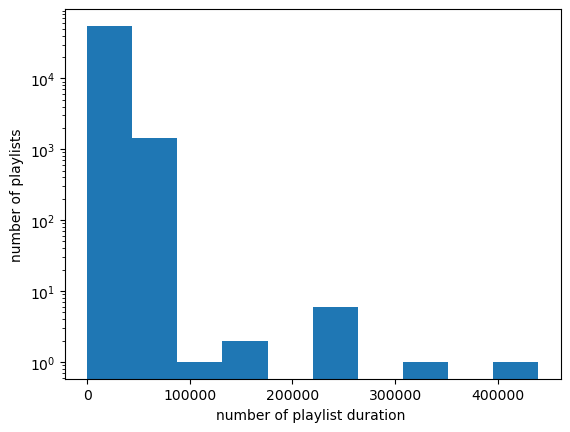

In [74]:
filename = '/home/tamak/master_exp/entities/playlist.idomaar'

duration_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        data = line.split('\t')[3]
        try:
            duration = int(data.split('"duration"')[1].removeprefix(':').removesuffix('}'))
            if duration > 0:
                duration_list.append(duration)
        except:
            print(data)

print(np.average(duration_list))
print(np.var(duration_list))
print( np.percentile( duration_list, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(duration_list, log = True)
plt.xlabel('number of playlist duration ')
plt.ylabel('number of playlists')
plt.show()

37372.0
6259.212427394804
59239562.53519322


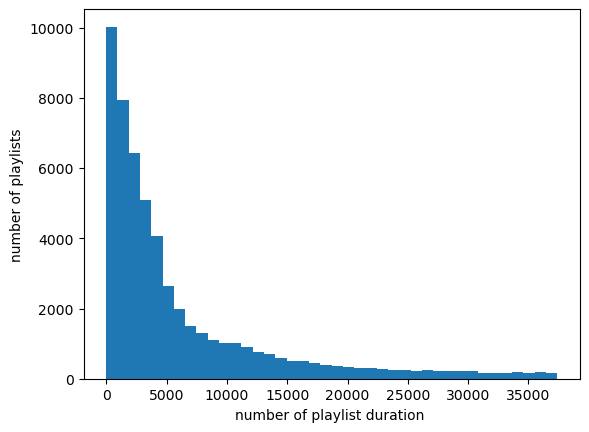

In [75]:
lim = np.percentile( duration_list, 95 )
print(lim)

duration_list = np.array(duration_list)

print(np.average(duration_list[duration_list<=lim]))
print(np.var(duration_list[duration_list<=lim]))

plt.figure()
plt.hist(duration_list, bins = 40 , range = [0,lim], log = False)
plt.xlabel('number of playlist duration ')
plt.ylabel('number of playlists')
plt.show()

## spotify playlists

In [14]:
# プレイリストのリスト

playlist_list = []
user_playlist_pairs = defaultdict(list)

with open( '/home/tamak/experiments/user_playlist_pairs.tsv', mode = 'r' ) as f:
    lines = f.readlines()

    for line in tqdm(lines[1:]) :
        l = line.split('\t')
        playlist = [l[1]] + np.array( l[2:], dtype=int ).tolist()

        if( playlist not in playlist_list ):    
            playlist_list.append( playlist )

100%|██████████| 231891/231891 [07:09<00:00, 539.62it/s] 


In [32]:
print(playlist_list[0])
print(len(playlist_list[0]))

['HARD ROCK 2010', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
68


100%|██████████| 208168/208168 [00:00<00:00, 2928360.19it/s]


平均： 59.977071403866105
分散： 81326.5878211916
中央値： 18.0
最頻値： 12
[  2.   4.  11.  18.  43. 104. 191.]


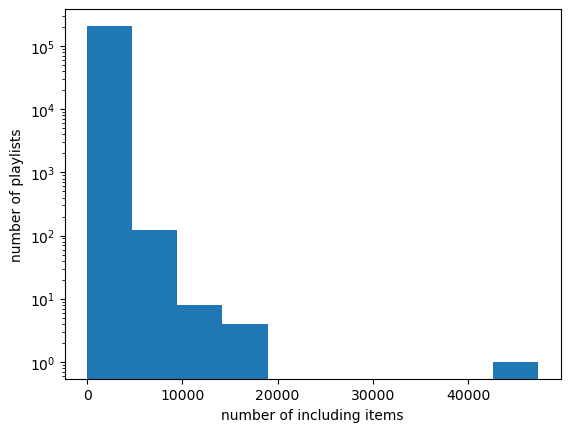

In [15]:
p_length = []

for playlist in tqdm( playlist_list):
    p_length.append(len(playlist) - 1 )

print('平均：',np.average(p_length))
print('分散：',np.var(p_length))
print('中央値：',stts.median(p_length))
print('最頻値：',stts.mode(p_length))
print( np.percentile( p_length, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(p_length, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of playlists')
plt.show()

191.0
30.112769561370243
1164.6230104941108


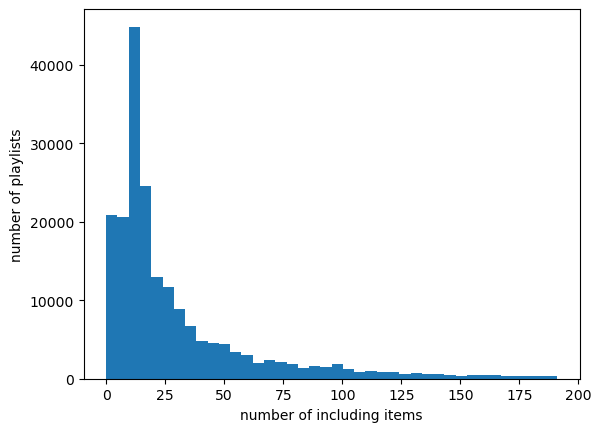

In [78]:
lim = np.percentile( p_length, 95 )
print(lim)

p_length = np.array(p_length)

print(np.average(p_length[p_length<=lim]))
print(np.var(p_length[p_length<=lim]))

plt.figure()
plt.hist(p_length, bins = 40 , range = [0,lim], log = False)
plt.xlabel('number of including items')
plt.ylabel('number of playlists')
plt.show()

# 30Mの楽曲数と継続時間の相関を測る

## session

In [83]:
filename = '/home/tamak/master_exp/relations/sessions.idomaar'

numtracks_list_ = []
duration_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        data = line.split('\t')[3].split(' ')[0]
        numtracks = int(data.split('"')[2].removeprefix(':').removesuffix(','))
        duration = int(data.split('"')[4].removeprefix(':').removesuffix('}'))
        if duration > 0:
            duration_list.append(duration)
            numtracks_list_.append(numtracks)

lim = np.percentile( numtracks_list_, 95 )
print(lim)
numtracks_list = np.array(numtracks_list_)
duration_list = np.array(duration_list)

# numtracks_list = numtracks_list[numtracks_list_<=lim]
# duration_list = duration_list[numtracks_list_<=lim]

print(  np.corrcoef( np.array([numtracks_list, duration_list]) )  )

44.0
[[1.         0.89846583]
 [0.89846583 1.        ]]


## playlist

In [82]:
filename = '/home/tamak/master_exp/entities/playlist.idomaar'

numtracks_list_ = []
duration_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        data = line.split('\t')[3]
        try:
            numtracks = int(data.split('"numtracks"')[1].split(',')[0].removeprefix(':'))
            duration = int(data.split('"duration"')[1].removeprefix(':').removesuffix('}'))
            if duration > 0:
                numtracks_list_.append(numtracks)
                duration_list.append(duration)
        except:
            print(data)

lim = np.percentile( numtracks_list_, 95 )
print(lim)
numtracks_list = np.array(numtracks_list_)
duration_list = np.array(duration_list)

# numtracks_list = numtracks_list[numtracks_list_<=lim]
# duration_list = duration_list[numtracks_list_<=lim]

print(  np.corrcoef( np.array([numtracks_list, duration_list]) )  )

144.0
[[1.         0.94126993]
 [0.94126993 1.        ]]


# 収集期間が~14/5/11のものに絞ってみる

715809
11.969693032638595
484.03719221279704
[ 1.  1.  2.  6. 13. 27. 41.]


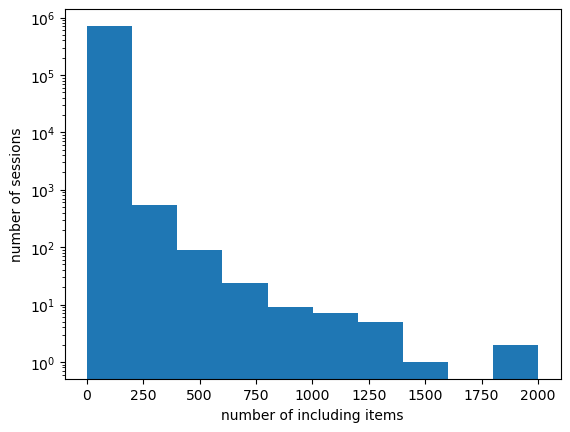

In [2]:
filename = '/home/tamak/master_exp/relations/sessions.idomaar'

numtracks_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        date = int(line.split('\t')[2])
        data = line.split('\t')[3].split(' ')[0]
        numtracks = int(data.split('"')[2].removeprefix(':').removesuffix(','))
        if date < 1399852800:
            numtracks_list.append(numtracks)

print(len(numtracks_list))
print(np.average(numtracks_list))
print(np.var(numtracks_list))
print( np.percentile( numtracks_list, [5, 10, 25, 50, 75, 90, 95] ) )

plt.figure()
plt.hist(numtracks_list, log = True)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

41.0
10.159446298606873
74.56007408816605


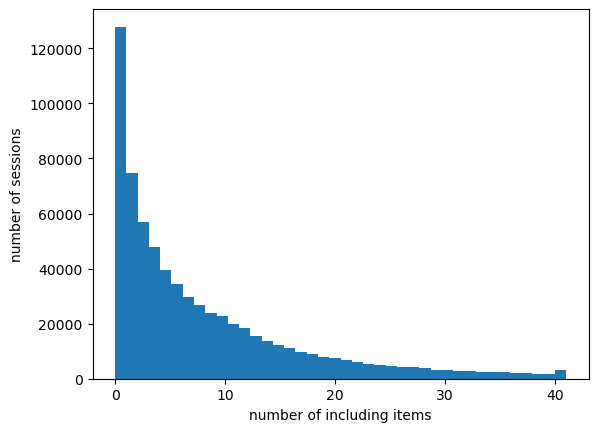

In [7]:
lim = np.percentile( numtracks_list, 95 )
print(lim)
numtracks_list = np.array(numtracks_list)

print(np.average(numtracks_list[(1<numtracks_list) & (numtracks_list<=lim)]))
print(np.var(numtracks_list[(1<numtracks_list) & (numtracks_list<=lim)]))

plt.figure()
plt.hist(numtracks_list, bins = 40 , range = [0,lim], log = False)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [12]:
len(numtracks_list[(1<numtracks_list)&(numtracks_list<10)])

334000

41.0
552211
10.159446298606873
74.56007408816605


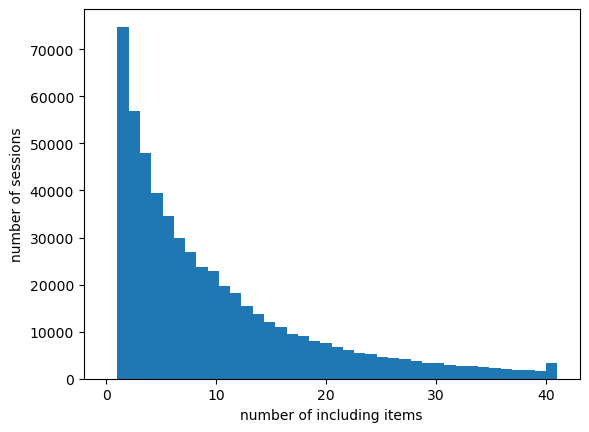

In [16]:
lim = np.percentile( numtracks_list, 95 )
print(lim)
numtracks_list2 = np.array(numtracks_list)[ (1<numtracks_list) & (numtracks_list<=lim) ]

print( len( numtracks_list2 ) )
print( np.average( numtracks_list2 ) )
print( np.var( numtracks_list2 ) )

plt.figure()
plt.hist(numtracks_list2, bins = 40 , range = [0,lim], log = False)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

In [89]:
filename = '/home/tamak/master_exp/relations/sessions.idomaar'

date_list = []

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        date = int(line.split('\t')[2])
        
        date_list.append(date)

print(min(date_list))
print(max(date_list))

1390209860
1421745857


# 30Mの時間帯ごとのセッション長

In [34]:
for i in range(24):
    print(datetime.time(i%24),'~',datetime.time((i+1)%24))

00:00:00 ~ 01:00:00
01:00:00 ~ 02:00:00
02:00:00 ~ 03:00:00
03:00:00 ~ 04:00:00
04:00:00 ~ 05:00:00
05:00:00 ~ 06:00:00
06:00:00 ~ 07:00:00
07:00:00 ~ 08:00:00
08:00:00 ~ 09:00:00
09:00:00 ~ 10:00:00
10:00:00 ~ 11:00:00
11:00:00 ~ 12:00:00
12:00:00 ~ 13:00:00
13:00:00 ~ 14:00:00
14:00:00 ~ 15:00:00
15:00:00 ~ 16:00:00
16:00:00 ~ 17:00:00
17:00:00 ~ 18:00:00
18:00:00 ~ 19:00:00
19:00:00 ~ 20:00:00
20:00:00 ~ 21:00:00
21:00:00 ~ 22:00:00
22:00:00 ~ 23:00:00
23:00:00 ~ 00:00:00


In [41]:
c = 0
with open( filename, mode = 'r' ) as f:
    # print(len(f.readlines()))
    for line in f.readlines():
        event_type, session_id, timestamp, info, linked_data = line.split()

        numtracks = json.loads(info)['numtracks']
        time = datetime.datetime.fromtimestamp(int(timestamp))
        time = time.time()

        i=23
        if datetime.time(i%24) <= time:
            c+=1

print(c)

151577


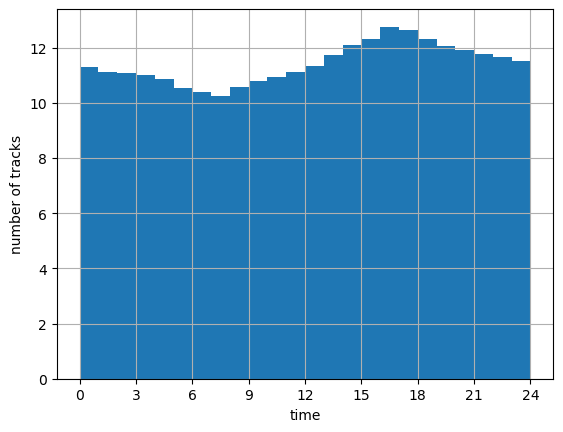

In [43]:
filename = '/home/tamak/master_exp/ThirtyMusic/relations/sessions.idomaar'

tracknum_dict = defaultdict(list)

with open( filename, mode = 'r' ) as f:
    for line in f.readlines():
        event_type, session_id, timestamp, info, linked_data = line.split()

        numtracks = json.loads(info)['numtracks']
        time = datetime.datetime.fromtimestamp(int(timestamp))
        time = time.time()

        for i in range(24):
            if i == 23 and datetime.time(i%24) <= time:
                tracknum_dict[i].append(numtracks)
            elif datetime.time(i%24) <= time and time < datetime.time((i+1)%24):
                tracknum_dict[i].append(numtracks)

time_list = []
numtrack_list = []

for time, nums in tracknum_dict.items():
    time_list.append(time+0.5)
    numtrack_list.append(np.average(nums))

plt.figure()
plt.bar(x=time_list, height=numtrack_list, width=1)
plt.xlabel('time')
plt.ylabel('number of tracks')
plt.xticks([i*3 for i in range(9) ])
plt.grid()
plt.show()

In [40]:
sum( [ len(l) for l in tracknum_dict.values()] )

2612897

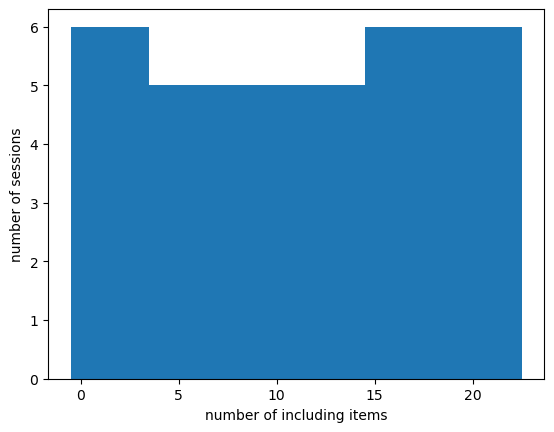

In [ ]:
time_list = []
numtrack_list = []

for time, nums in tracknum_dict.items():
    time_list.append(time)
    numtrack_list.append(stts.median(nums))

plt.figure()
plt.bar(x=time_list, height=numtrack_list, width=1)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()

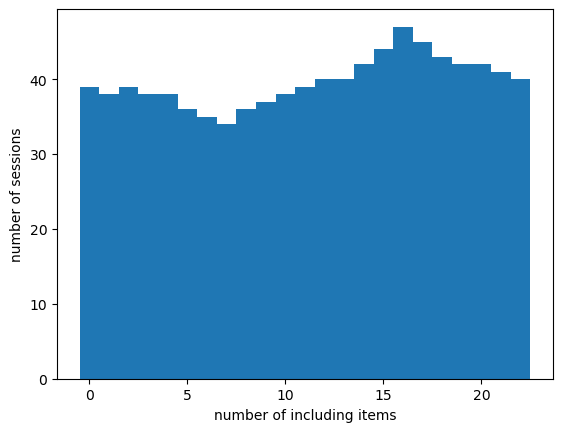

In [21]:
time_list = []
numtrack_list = []

for time, nums in tracknum_dict.items():
    time_list.append(time)
    numtrack_list.append(np.percentile(nums, 95))

plt.figure()
plt.bar(x=time_list, height=numtrack_list, width=1)
plt.xlabel('number of including items')
plt.ylabel('number of sessions')
plt.show()